In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json as js
import tweepy as tw
from tweepy import OAuthHandler
import time
import os
import io
import requests as rq
import re
from numpy import mean

In [2]:
twitter_archive_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Download image prediction file programatically

In [4]:
# assign download-link to a variable "url"
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# downlaod the file
response = rq.get(url)

# access the content of the downloaded file and write to the name of the file "image-prediction.tsv"
with open(os.path.join(url.split('/')[-1]), mode='wb') as image_file:
    image_file.write(response.content)

In [5]:
# load image-prediction.tsv
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
# load the image_prediction_df file
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Dataset from twitter using API

In [7]:
with open('tweepy.json', 'r') as f:
    key = js.load(f)

In [8]:
consumer_key = key['API Key']
consumer_secret = key['API Key Secret']
access_token = key['Access Token']
access_secret = key['Access Token Secret']

In [9]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, parser=tw.parsers.JSONParser(), wait_on_rate_limit=True)

In [10]:
# copy all tweet_id from 'twitter_archive_enhance.csv' into a list variable 'id_list'
id_list = list(twitter_archive_enhanced_df.tweet_id)

In [11]:
# view id_list
id_list

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [12]:
# check number of values in list
print(len(id_list))

2356


In [27]:
# loop through id_list to query the Twitter API for each JSON data specific to each tweet_id in the id_list and safe the result to 'tweet_json.txt'
# for error handling, use try and exception to get tweet_ids with error

# define dictionary variable to save tweet_id with errors
tweet_errors = {}
#  declare start time
start_time = time.time()

# tweets json file save as text (.txt) file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in id_list:
        index = id_list.index(tweet_id) + 1
        try:
            # use .get_status to get each tweets entire set
            tweet_status = api.get_status(tweet_id, tweet_mode = 'extended')
            print(str(index) + ':- ' + str(tweet_id) + ' success')
            # dump each tweet jason
            js.dump(tweet_status, outfile)
            outfile.write('\n')
            
        # error handling: save tweets_ids and type of error that occcurs while querying the API
        except tw.TweepyException as error:
            # print the index and tweet_id with the type of error
            print(str(index) + ':- ' + str(tweet_id) + ' fail')
            # save error
            tweet_errors[str(index) + ':- ' + str(tweet_id)] = error
# declare end time
end_time = time.time()

# print the time required to querry the API for all tweet_id in the id_list
print(f'\nQuerry duration is: {end_time - start_time}' + '\n')

print('number of tweet_id that failed is: ' + str(len(tweet_errors)) + '\n')

print('error message of tweet_id that failed is:\n' + str(tweet_errors))


1:- 892420643555336193 success
2:- 892177421306343426 success
3:- 891815181378084864 success
4:- 891689557279858688 success
5:- 891327558926688256 success
6:- 891087950875897856 success
7:- 890971913173991426 success
8:- 890729181411237888 success
9:- 890609185150312448 success
10:- 890240255349198849 success
11:- 890006608113172480 success
12:- 889880896479866881 success
13:- 889665388333682689 success
14:- 889638837579907072 success
15:- 889531135344209921 success
16:- 889278841981685760 success
17:- 888917238123831296 success
18:- 888804989199671297 success
19:- 888554962724278272 success
20:- 888202515573088257 fail
21:- 888078434458587136 success
22:- 887705289381826560 success
23:- 887517139158093824 success
24:- 887473957103951883 success
25:- 887343217045368832 success
26:- 887101392804085760 success
27:- 886983233522544640 success
28:- 886736880519319552 success
29:- 886680336477933568 success
30:- 886366144734445568 success
31:- 886267009285017600 success
32:- 886258384151887

Rate limit reached. Sleeping for: 283


320:- 834477809192075265 success
321:- 834458053273591808 success
322:- 834209720923721728 success
323:- 834167344700198914 success
324:- 834089966724603904 success
325:- 834086379323871233 success
326:- 833863086058651648 success
327:- 833826103416520705 success
328:- 833732339549220864 success
329:- 833722901757046785 success
330:- 833479644947025920 success
331:- 833124694597443584 success
332:- 832998151111966721 success
333:- 832769181346996225 success
334:- 832757312314028032 success
335:- 832682457690300417 success
336:- 832645525019123713 success
337:- 832636094638288896 success
338:- 832397543355072512 success
339:- 832369877331693569 success
340:- 832273440279240704 success
341:- 832215909146226688 success
342:- 832215726631055365 success
343:- 832088576586297345 success
344:- 832040443403784192 success
345:- 832032802820481025 success
346:- 831939777352105988 success
347:- 831926988323639298 success
348:- 831911600680497154 success
349:- 831670449226514432 success
350:- 8316

Rate limit reached. Sleeping for: 227


1220:- 714631576617938945 success
1221:- 714606013974974464 success
1222:- 714485234495041536 success
1223:- 714258258790387713 success
1224:- 714251586676113411 success
1225:- 714214115368108032 success
1226:- 714141408463036416 success
1227:- 713919462244790272 success
1228:- 713909862279876608 success
1229:- 713900603437621249 success
1230:- 713761197720473600 success
1231:- 713411074226274305 success
1232:- 713177543487135744 success
1233:- 713175907180089344 success
1234:- 712809025985978368 success
1235:- 712717840512598017 success
1236:- 712668654853337088 success
1237:- 712438159032893441 success
1238:- 712309440758808576 success
1239:- 712097430750289920 success
1240:- 712092745624633345 success
1241:- 712085617388212225 success
1242:- 712065007010385924 success
1243:- 711998809858043904 success
1244:- 711968124745228288 success
1245:- 711743778164514816 success
1246:- 711732680602345472 success
1247:- 711694788429553666 success
1248:- 711652651650457602 success
1249:- 7113638

Rate limit reached. Sleeping for: 237


2120:- 670417414769758208 success
2121:- 670411370698022913 success
2122:- 670408998013820928 success
2123:- 670403879788544000 success
2124:- 670385711116361728 success
2125:- 670374371102445568 success
2126:- 670361874861563904 success
2127:- 670338931251150849 success
2128:- 670319130621435904 success
2129:- 670303360680108032 success
2130:- 670290420111441920 success
2131:- 670093938074779648 success
2132:- 670086499208155136 success
2133:- 670079681849372674 success
2134:- 670073503555706880 success
2135:- 670069087419133954 success
2136:- 670061506722140161 success
2137:- 670055038660800512 success
2138:- 670046952931721218 success
2139:- 670040295598354432 success
2140:- 670037189829525505 success
2141:- 670003130994700288 success
2142:- 669993076832759809 success
2143:- 669972011175813120 success
2144:- 669970042633789440 success
2145:- 669942763794931712 success
2146:- 669926384437997569 success
2147:- 669923323644657664 success
2148:- 669753178989142016 success
2149:- 6697494

In [28]:
# open tweet_json.txt file and extract tweet_id, retweet_count, favorite_count into a dataframe

# declare df_list to hold tweet_id,retweet_count, favorite_count
df_list = []
# open and read the tweet_json.txt file
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        read_line = js.loads(line)
        print(read_line)
        break

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [29]:
read_line.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [13]:
# open tweet_json.txt file and extract tweet_id, retweet_count, favorite_count into a dataframe

# declare df_list to hold tweet_id,retweet_count, favorite_count
df_list = []
# open and read the tweet_json.txt file
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        line_read = js.loads(line)
        tweet_id = line_read['id']
        retweet_count = line_read['retweet_count']
        favorite_count = line_read['favorite_count']
        verified_user = line_read['user']['verified']
        
        df_list.append({'id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
        
# create DataFrame from df_list
twitter_additional_df = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [14]:
df_list

[{'id': 892420643555336193, 'retweet_count': 7003, 'favorite_count': 33801},
 {'id': 892177421306343426, 'retweet_count': 5301, 'favorite_count': 29321},
 {'id': 891815181378084864, 'retweet_count': 3478, 'favorite_count': 22043},
 {'id': 891689557279858688, 'retweet_count': 7216, 'favorite_count': 36885},
 {'id': 891327558926688256, 'retweet_count': 7757, 'favorite_count': 35308},
 {'id': 891087950875897856, 'retweet_count': 2600, 'favorite_count': 17804},
 {'id': 890971913173991426, 'retweet_count': 1662, 'favorite_count': 10361},
 {'id': 890729181411237888, 'retweet_count': 15753, 'favorite_count': 56854},
 {'id': 890609185150312448, 'retweet_count': 3619, 'favorite_count': 24517},
 {'id': 890240255349198849, 'retweet_count': 6098, 'favorite_count': 27956},
 {'id': 890006608113172480, 'retweet_count': 6151, 'favorite_count': 27033},
 {'id': 889880896479866881, 'retweet_count': 4165, 'favorite_count': 24562},
 {'id': 889665388333682689, 'retweet_count': 8348, 'favorite_count': 42052}

In [15]:
twitter_additional_df

,id,retweet_count,favorite_count
0,892420643555336193,7003,33801
1,892177421306343426,5301,29321
2,891815181378084864,3478,22043
3,891689557279858688,7216,36885
4,891327558926688256,7757,35308
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


> **VISUAL ASSESSMENT**

In [16]:
# view twitter_archive_enhanced_df dataset
twitter_archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> the dataset has alot of missing values in some columns

In [17]:
# view twitter_archive_enhanced_df dataset
twitter_archive_enhanced_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [18]:
# view twitter archive dataset randomly
twitter_archive_enhanced_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
665,790698755171364864,NaN,NaN,2016-10-24 23:37:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mosby. He appears to be rather h*ckin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790698755...,12,10,Mosby,None,None,None,None
903,758405701903519748,NaN,NaN,2016-07-27 20:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He falls asleep wherever he want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758405701...,10,10,Odie,None,None,None,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
1641,684122891630342144,NaN,NaN,2016-01-04 21:23:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene of two pups that want nothi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684122891...,11,10,None,None,None,None,None
628,794926597468000259,NaN,NaN,2016-11-05 15:37:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mack. He's rather h*ckin sleepy. Excep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794926597...,12,10,Mack,None,None,None,None
1988,672834301050937345,NaN,NaN,2015-12-04 17:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Ed. He's not mad, just disappointed. 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/672834301...,10,10,Ed,None,None,None,None
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None


In [19]:
# view twitter additional dataset first 5 rows
twitter_additional_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7003,33801
1,892177421306343426,5301,29321
2,891815181378084864,3478,22043
3,891689557279858688,7216,36885
4,891327558926688256,7757,35308


In [20]:
# view image_predictions_df dataset tail
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
# view image_predictions_df dataset randomly
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1702,817171292965273600,https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg,1,golden_retriever,0.295483,True,Irish_setter,0.144431,True,Chesapeake_Bay_retriever,0.077879,True
824,693231807727280129,https://pbs.twimg.com/media/CZ7aplIUsAAq-8s.jpg,1,vizsla,0.876413,True,Chesapeake_Bay_retriever,0.078400,True,Rhodesian_ridgeback,0.032194,True
1859,842115215311396866,https://pbs.twimg.com/media/C6_LTCZWoAAKm_O.jpg,1,chow,0.293493,True,Newfoundland,0.181336,True,schipperke,0.125152,True
1049,713761197720473600,https://pbs.twimg.com/media/CefKBOuWIAAIlKD.jpg,1,Brittany_spaniel,0.797936,True,English_springer,0.044718,True,Welsh_springer_spaniel,0.037911,True
258,670780561024270336,https://pbs.twimg.com/media/CU8XW2dWwAA-Lmc.jpg,1,Labrador_retriever,0.244889,True,American_black_bear,0.056993,False,brown_bear,0.053993,False
720,685943807276412928,https://pbs.twimg.com/ext_tw_video_thumb/68594...,1,papillon,0.200812,True,toy_terrier,0.114512,True,Cardigan,0.094520,True
42,666739327293083650,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,Pembroke,0.987407,True,Cardigan,0.008723,True,basenji,0.003424,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False


In [22]:
# view twitter additional dataset randomly
twitter_additional_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7003,33801
1,892177421306343426,5301,29321
2,891815181378084864,3478,22043
3,891689557279858688,7216,36885
4,891327558926688256,7757,35308


In [23]:
# view twitter additional dataset randomly
twitter_additional_df.tail()

,id,retweet_count,favorite_count
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,422,2292


In [24]:
# view twitter additional dataset randomly
twitter_additional_df.sample(10)

,id,retweet_count,favorite_count
1366,700002074055016451,1206,3038
544,802572683846291456,2356,8518
56,881268444196462592,4492,20476
470,813944609378369540,2957,0
1821,675740360753160193,295,1061
452,816816676327063552,1895,9480
1384,698953797952008193,831,2490
905,753655901052166144,1995,5461
2319,666055525042405380,196,367
2037,671147085991960577,192,586


> **PROGRAMATIC ASSESSMENT**

In [25]:
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> the dataset has 2356 rows and 17 columns. 5 columns has huge number of missing values, also datatype issues

In [26]:
# function to loop through to check null value
def _isnull(df):
    column_list = list(df.columns)
    for column in column_list:
        print(f'number of null value in {column} is {sum(df[column].isnull())}\n')

In [27]:
_isnull(twitter_archive_enhanced_df)

number of null value in tweet_id is 0

number of null value in in_reply_to_status_id is 2278

number of null value in in_reply_to_user_id is 2278

number of null value in timestamp is 0

number of null value in source is 0

number of null value in text is 0

number of null value in retweeted_status_id is 2175

number of null value in retweeted_status_user_id is 2175

number of null value in retweeted_status_timestamp is 2175

number of null value in expanded_urls is 59

number of null value in rating_numerator is 0

number of null value in rating_denominator is 0

number of null value in name is 0

number of null value in doggo is 0

number of null value in floofer is 0

number of null value in pupper is 0

number of null value in puppo is 0



In [28]:
# function to show percentage of missing values
def n_missing(df, column=""):
    print(f'Percentage of null value in {column}: ' + '{0:.1f}%\n'.format(100 - (df[column].count()/df.shape[0]) * 100))  

In [29]:
# list of columns to pass to function
column_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
               'retweeted_status_timestamp', 'expanded_urls']

In [30]:
# loop through to print vales
for column in column_list:
    n_missing(twitter_archive_enhanced_df, column = column)

Percentage of null value in in_reply_to_status_id: 96.7%

Percentage of null value in in_reply_to_user_id: 96.7%

Percentage of null value in retweeted_status_id: 92.3%

Percentage of null value in retweeted_status_user_id: 92.3%

Percentage of null value in retweeted_status_timestamp: 92.3%

Percentage of null value in expanded_urls: 2.5%



> status_IDs, user_IDs and status_timestamp over 90% missing values

In [31]:
# function to check duplicated value
def n_duplicated(df, column="", df_name = "dataframe"):
    if column == "":
        print(f'number of duplicated value in {df_name}: {df.duplicated().sum()}')
    if column !="":
        print(f'number of duplicated {column} in {df_name}: {df[column].duplicated().sum()}\n')

In [32]:
n_duplicated(twitter_archive_enhanced_df, df_name = "twitter_archive_enhanced_df")

number of duplicated value in twitter_archive_enhanced_df: 0


In [33]:
twitter_archive_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> the ratings has an outliers, maximum of 1776, 170 for numerators, denominators respectively and minimum of 0s

In [34]:
# loop through to check for unique value
column_list = ['source', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']

for column in column_list:
    print(f'\nunique value in {column}:\n {twitter_archive_enhanced_df[column].unique()}')


unique value in source:
 ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

unique value in rating_numerator:
 [  13   12   14    5   17   11   10  420  666    6   15  182  960    0
   75    7   84    9   24    8    1   27    3    4  165 1776  204   50
   99   80   45   60   44  143  121   20   26    2  144   88]

unique value in rating_denominator:
 [ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]

unique value in name:
 ['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'None' 'Jax' 'Zoey'
 'Cassie' 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus'
 'Canela' 'Gerald' 'Jeffrey' 'such' 'Maya' 'Mingus' 'Derek' 'Roscoe'
 'Waffles' 'Jimbo' 'Maisey' 'Lilly' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah'
 'Bella

> unique values in source are just 4 but lengthy, name column has lower case words such as *an,his,this,...* 

In [35]:
# check for rating_numerator that falls within this range (observing for outliers)
twitter_archive_enhanced_df[twitter_archive_enhanced_df['rating_numerator'].between(20, 1776)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


> the numerator value that fall between 20, 1776 are **25**.

In [36]:
# check for denominator rating above 10
twitter_archive_enhanced_df.query('rating_denominator > 10.0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


> the denominator values above 10 are **20**.

In [37]:
# check for denominator ratings below 10
twitter_archive_enhanced_df.query('rating_denominator == 10.0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [38]:
# check for denominator rating below 10
twitter_archive_enhanced_df.query('rating_denominator < 10.0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


> the denominator value below 10 are **3**.

In [39]:
# view text for confirmation of rating_numerator that falls within this range
twitter_archive_enhanced_df[twitter_archive_enhanced_df['rating_numerator'].between(20, 1776)].text

188     @dhmontgomery We also gave snoop dogg a 420/10...
189     @s8n You tried very hard to portray this good ...
290                                    @markhoppus 182/10
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
340     RT @dog_rates: This is Logan, the Chow who liv...
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
902     Why does this never happen at my front door......
979     This is Atticus. He's quite simply America af....
1120    Say hello to this unbelievably well behaved sq...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy 

In [40]:
# view text for confirmation of denominator rating above 10
twitter_archive_enhanced_df.query('rating_denominator > 10.0').text

342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1662    This is Darrel. He just robbed a 7/11 and is i...
1663    I'm aw

In [41]:
# view the whole observation text
list(twitter_archive_enhanced_df.text)

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps:

> the text in the rating fields were extracted from the first digits in the text, moreover the actual ratings are towards the end each text. 

In [42]:
# to confirmend rating_denominator that are not equal to 10
error_denominator =  twitter_archive_enhanced_df.query('rating_denominator != 10')
list(error_denominator.text)

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 '@docmisterio account started on 11/15/15',
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This

> some ratings were multiplied with a number, 143/130 have 13 as multiplier it  should be 11/10

In [43]:
# to confirm the validity of lower case observations under name columns
lower_list = []
for name in list(twitter_archive_enhanced_df.name):
    if name.islower() and name not in lower_list:
        lower_list.append(name)
print(lower_list)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


> all lower case words are not Name

In [44]:
# prediction information
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> 2075 rows, 12 columns, it has wrong datatype

In [45]:
n_duplicated(image_predictions_df, df_name = "image_predictions_df")

number of duplicated value in image_predictions_df: 0


In [46]:
n_duplicated(image_predictions_df, column = 'tweet_id')

number of duplicated tweet_id in dataframe: 0



> no duplicated values

In [47]:
# statistical view
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> maximum number of images in a tweet is 4, minimum is 1. there is prediction confidence of 1 i.e 100% Correct

In [48]:
# to confirm p1_conf > p2_conf > p3_conf in image_predictions_df. it will not throw error if TRUE
p1_conf_is_highest = image_predictions_df.p1_conf > image_predictions_df.p2_conf
p3_conf_is_lowest = image_predictions_df.p2_conf > image_predictions_df.p3_conf
assert p1_conf_is_highest.all() and p3_conf_is_lowest.all()

> prediction 1 in all rows is always higher in value than others

In [49]:
# additional file
twitter_additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


> number of row is 2327 and column is 3, id has wrong datatype

In [50]:
# to check for duplicate in id.
n_duplicated(twitter_additional_df, column = 'id', df_name = "twitter_additional_df")

number of duplicated id in twitter_additional_df: 0



> no duplicated id

In [51]:
twitter_additional_df.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2470.071336,7052.354104
std,6.820795e+16,4183.235297,10959.386180
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1225.000000
50%,7.178418e+17,1148.000000,3051.000000
75%,7.986547e+17,2860.500000,8601.000000
max,8.924206e+17,70704.000000,144831.000000


In [52]:
# to check for duplicated column name across the three dataframes
all_columns = pd.Series(list(twitter_archive_enhanced_df) + list(image_predictions_df))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

> dataframes have tweet_id in common

### Quality Issue

#### twitter_archive_enhanced_df

1. The twitter_archive_enhanced_df columns contained retweets which are  *retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp* with **181 retweets observations**
2. missing values:
 - *in_reply_to_status_id, in_reply_to_user_id* has about **96.7% missing values**
 - *retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp* has **92.3% missing values**
 - *expanded_urls* has **2.5% missing values**
3. wrong datatype:
 - *ID* fields in all the three dataframes are integer instead of string.
 - *timestamp* is string instead of datetime. 
 - *rating_numerator and rating_denominator* are integer instead of float.
4. some *numerator_rating and denominator_rating* are not correctly extracted from the *text*
5. Invalid value:
 - *name* column has invalid value which are all in lower case
6. *source* column observations are lenghty
- *p2, p1_conf, p2_dog, p3, p3_conf,p3_dog* are irrelevant.
- *img_num, p1, p1_conf, p1_dog* columns are not descriptive.
- *p1_conf* prefers as whole number integer

#### image_predictions_df

1. Incosistency data:
 - *p1, p2, p3* contains mix of upper case and lower case values. this was first detected using **.sample() method** and letter confirmed using **.query() method**

### Tidiness Issue

#### twitter_archive_enhanced_df
 
- observation *doggo, floofer, pupper, puppo* which are dog stage are used as variable/column 

- *twitter_archive_enhanced_df, image_predictions_df* and *twitter_additional_df* are related observation unit that form separate table instead of combine table.

## Cleaning

In [53]:
# copy dataframes before cleaning
archive_clean = twitter_archive_enhanced_df.copy()
predictions_clean = image_predictions_df.copy()
additional_clean = twitter_additional_df.copy()

In [54]:
archive_clean.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [55]:
predictions_clean.head(0)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [56]:
additional_clean.head(0)

,id,retweet_count,favorite_count


### twitter_archive_enhanced_df Quality Issues Cleaning

### Define

**1. Drop rows that have retweets value using isna() or isnull() method and reset the index**

### Code

In [57]:
# to drop rows that has retweet value and reset index
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()].reset_index(drop=True)

### Test

In [58]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Define

**2. Drop in_reply_to_status_id, in_reply_to_user_id and all retweets columns using drop() method**

### Code

In [59]:
# to drop 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'
column_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
               'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_clean.drop(columns = column_list, inplace=True)

### Test

In [60]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Define

**3. convert the datatypes to the required dataypes as further explain in the comment session below.**

### Code

In [61]:
# convert tweet_id datatype from integer to string 
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

# convert timestamp from string to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# convert rating_numerator from integer to float
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

# convert rating_denominator from integer to float
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

### Test

In [62]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   float64            
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### Define

**4. Replace rating_numerator, rating_denominator value with "" (empty string)**

### Code

In [63]:
# to replace_rating numerator and rating_denominator with ""
archive_clean['rating_numerator'] = ""
archive_clean['rating_denominator'] = ""

### Test

In [64]:
print(f'unique in rating_numerator is: {archive_clean.rating_numerator.unique()}\n\n\
unique in rating_denominator is: {archive_clean.rating_denominator.unique()}')

unique in rating_numerator is: ['']

unique in rating_denominator is: ['']


### Define

- **Extract rating_numerator, rating_denominator from text and assign to rating_numerator and rating_denominator column respectively**

### Code

In [65]:
# function to extract rating from text using findall
def extract_rating(_list):
    if re.findall("(\d+\.\d+/\d+)", _list) != []:
        return re.findall("(\d+\.\d+/\d+)", _list)
    else:
        if re.findall("(\d+/\d+)", _list) == re.findall("(\d+/\d+)", _list):
            return re.findall("(\d+/\d+)", _list)

In [66]:
# to extract rating_numerator and rating_denominator from text 122322
rating_num = []
rating_deno = []
len(list(archive_clean.text))
for row in list(archive_clean.text):
    rating_num.append(extract_rating(row)[-1].split('/')[0])
    rating_deno.append(extract_rating(row)[-1].split('/')[1])

# fill the extracted ratinngs in the numerator and denominator column
archive_clean['rating_numerator'] = rating_num
archive_clean['rating_denominator'] = rating_deno

# convert back to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

### Test

In [67]:
print(f'unique in rating_numerator is: {list(archive_clean.rating_numerator.unique())}\n\n\
unique in rating_denominator is: {list(archive_clean.rating_denominator.unique())}')

unique in rating_numerator is: [13.0, 12.0, 14.0, 13.5, 11.0, 10.0, 420.0, 666.0, 6.0, 182.0, 15.0, 0.0, 7.0, 84.0, 24.0, 9.75, 5.0, 11.27, 3.0, 8.0, 9.0, 4.0, 165.0, 1776.0, 204.0, 99.0, 80.0, 45.0, 60.0, 2.0, 44.0, 1.0, 143.0, 121.0, 20.0, 9.5, 11.26, 144.0, 88.0]

unique in rating_denominator is: [10.0, 15.0, 70.0, 7.0, 150.0, 170.0, 90.0, 80.0, 50.0, 40.0, 20.0, 130.0, 110.0, 16.0, 120.0]


### Define

- replace all rating below denominator of 10 with np.nan

### Code

In [68]:
index_list = [162,163,246,287, 429,804,1419,1484,1895]
for num in index_list:
    num_rating = archive_clean.iloc[num]['rating_numerator']
    non_rating = archive_clean['rating_numerator'] == num_rating
    archive_clean.loc[non_rating, 'rating_numerator'] = np.nan
    archive_clean.loc[non_rating, 'rating_denominator'] = np.nan

### Test

In [69]:
# to test rating_numerator
index_list = [162,163,246,287, 429,804,1419,1484,1895]
for num in index_list:
    print(f'index {num} in rating_numerator is: {archive_clean.iloc[num].rating_numerator}')


index 162 in rating_numerator is: nan
index 163 in rating_numerator is: nan
index 246 in rating_numerator is: nan
index 287 in rating_numerator is: nan
index 429 in rating_numerator is: nan
index 804 in rating_numerator is: nan
index 1419 in rating_numerator is: nan
index 1484 in rating_numerator is: nan
index 1895 in rating_numerator is: nan


In [70]:
# to test rating_denominator
index_list = [162,163,246,287, 429,804,1419,1484,1895]
for num in index_list:
    print(f'index {num} in rating_denominator is: {archive_clean.iloc[num].rating_denominator}')

index 162 in rating_denominator is: nan
index 163 in rating_denominator is: nan
index 246 in rating_denominator is: nan
index 287 in rating_denominator is: nan
index 429 in rating_denominator is: nan
index 804 in rating_denominator is: nan
index 1419 in rating_denominator is: nan
index 1484 in rating_denominator is: nan
index 1895 in rating_denominator is: nan


### Define

- replace all inputed values with multipliers with the correct value using the multiplying factor pattern

In [71]:
# correct the multiplier
index_list = [363, 733, 942,1050,1075,1095,1172,1254,1455,1456,1600,1664]

for num in index_list:
    num_rating = archive_clean.iloc[num]['rating_numerator']
    deno_rating = archive_clean.iloc[num]['rating_denominator']
    
    cal_num_rating = (num_rating * 10)/deno_rating
    cal_deno_rating = (deno_rating * cal_num_rating)/num_rating
    
    non_rating = archive_clean['rating_numerator'] == num_rating
    archive_clean.loc[non_rating, 'rating_numerator'] = cal_num_rating
    archive_clean.loc[non_rating, 'rating_denominator'] = cal_deno_rating

### Test

In [72]:
print(f'unique observation in denominator rating is:\n{list(archive_clean.rating_denominator.unique())}\n')
print(f'unique observation in numerator rating is:\n{list(archive_clean.rating_numerator.unique())}')

unique observation in denominator rating is:
[10.0, nan]

unique observation in numerator rating is:
[13.0, 12.0, 14.0, 13.5, nan, 10.0, 6.0, 15.0, 0.0, 7.0, 9.75, 5.0, 11.27, 3.0, 8.0, 9.0, 11.0, 2.0, 1.0, 9.5, 11.26]


In [73]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1304,693262851218264065,2016-01-30 02:41:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,https://twitter.com/dog_rates/status/693262851...,NaN,NaN,None,None,None,pupper,None
1430,685547936038666240,2016-01-08 19:45:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Everybody needs to read this. Jack is our firs...,https://twitter.com/dog_rates/status/685547936...,14.0,10.0,None,None,None,pupper,None
1003,719332531645071360,2016-04-11 01:13:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,https://twitter.com/dog_rates/status/719332531...,NaN,NaN,Pippa,None,None,None,None
537,790337589677002753,2016-10-23 23:42:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She can hear your cells divide. 1...,https://twitter.com/dog_rates/status/790337589...,12.0,10.0,Maggie,None,None,None,None
1383,688211956440801280,2016-01-16 04:11:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Derby. He's a superstar. 13/10 (vid by...,https://twitter.com/dog_rates/status/688211956...,13.0,10.0,Derby,None,None,None,None


In [74]:
print(f'number of rows in rating_denominator is: {len(archive_clean.rating_denominator)}')
# return true if equal
print(f'is rating_denominator row number equals rating_denominator row number: {len(archive_clean.rating_numerator) == len(archive_clean.rating_denominator)}')

number of rows in rating_denominator is: 2175
is rating_denominator row number equals rating_denominator row number: True


### Define

**5. replace all invalid names which are all lower letters to None**

### Code

In [75]:
# to replace lower letters with string None
archive_clean.name.replace(lower_list, 'None', inplace=True)

### Test

In [76]:
# to check, this should not throw error if no lower letters in name
for lower in archive_clean.name:
    assert lower.islower() is not archive_clean.name

### twitter_archive_enhanced_df Tidiness Issue Cleaning

### Define

1. **Replace source observation with a unique object in each observation**

### Code

In [77]:
# to replace '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' with iPhone
initial = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
           '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
           '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
           '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
final = ['iPhone', 'Web Client', 'Vine', 'TweetDeck']

count = 0

for source in initial:
    archive_clean.source.mask(archive_clean.source == source, final[count], inplace=True)
    count+=1

### Test

In [78]:
archive_clean.source.unique()

array(['iPhone', 'Web Client', 'Vine', 'TweetDeck'], dtype=object)

### Define

**2. Replace "None" with "" (empty string), create variable "dog_stage and fill with the combine dog stage observations, then Drop pupper, doggo, puppo, floofer columns**.

In [79]:
# to replace the None with "" using loop
dog_list = ['doggo', 'floofer', 'pupper', 'puppo']
for dog in dog_list:
    archive_clean[dog].replace('None', '', inplace=True)

In [80]:
# combine the dog observations and fill under variable dog_stage
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [81]:
# to drop pupper, doggo, puppo, floofer columns
column_list = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean.drop(columns = column_list, inplace=True)

### Test

In [82]:
archive_clean.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [83]:
archive_clean.dog_stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [84]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Define 

- **Separate the combined dog_stage with comma (,) using replace() method to each dog_stage e.g, doggofloofer to doggo,floofer and fill the empty string with np.nan**

In [85]:
# to separate the combined dog_stage observations
dog_comb = ['doggopupper', 'doggopuppo', 'doggofloofer']
dog_sep = ['doggo, pupper', 'doggo, puppo', 'doggo, floofer']
count = 0
for dog in dog_comb:
    archive_clean.dog_stage.mask(archive_clean.dog_stage == dog, dog_sep[count], inplace=True)
    count+=1

In [86]:
# to fill the empty string with NaN
archive_clean.dog_stage.replace('', np.nan, inplace=True)

### Test

In [87]:
archive_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [88]:
archive_clean.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Define

- drop the rating denominator and rename rating numerator to ratings

In [89]:
# to drop the denominator column
archive_clean.drop(columns=['rating_denominator', 'expanded_urls'], inplace=True)

In [90]:
# to rename rating numerator to ratings
archive_clean.rename(columns={'rating_numerator':'ratings'}, inplace=True)

In [91]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'ratings', 'name',
       'dog_stage'],
      dtype='object')

### image_predictions_df Quality Issues Cleaning

### Define

1. **change the tweet_id datatype from int to string**

### Code

In [92]:
# to change datatype to string
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

### Test

In [93]:
print(predictions_clean.tweet_id.dtypes)

object


### Define

2. **replace _ with space in p1, p2, p3 observations and change to title format**

### Code

In [94]:
# function to replace and change format
def _format(df, column = ''):
    df[column] = df[column].str.replace('_', ' ').str.title()

In [95]:
# to format p1,p2,p3
p_list = ['p1','p2','p3']
for p in p_list:
    _format(predictions_clean, column = p)

### Test

In [96]:
predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1305,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,Bluetick,0.360071,True,Crutch,0.134816,False,Tripod,0.098207,False
774,689623661272240129,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,1,Toy Poodle,0.279604,True,Mashed Potato,0.208564,False,Labrador Retriever,0.077481,True
908,700505138482569216,https://pbs.twimg.com/media/Cbixs3vUUAAqHHN.jpg,1,Bath Towel,0.449684,False,Norwegian Elkhound,0.160205,True,Great Dane,0.048666,True
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador Retriever,0.861651,True,Golden Retriever,0.044462,True,Staffordshire Bullterrier,0.016497,True
843,695064344191721472,https://pbs.twimg.com/ext_tw_video_thumb/69506...,1,Seat Belt,0.522211,False,Sunglasses,0.077552,False,Ice Lolly,0.051774,False
1779,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,Teddy,0.908457,False,Toy Poodle,0.018040,True,Standard Poodle,0.012667,True
1423,772117678702071809,https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg,1,Labrador Retriever,0.217821,True,Beagle,0.157677,True,Golden Retriever,0.127726,True
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great Dane,0.869681,True,American Staffordshire Terrier,0.026658,True,Boxer,0.019866,True
629,680913438424612864,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,1,Pomeranian,0.615678,True,Golden Retriever,0.126455,True,Chihuahua,0.087184,True
1606,800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,Teddy,0.311928,False,Ice Bear,0.184657,False,Christmas Stocking,0.173229,False


### image_predictions_df Tidiness Issue Cleaning

### Define
 
 1. replace p1 with None where p1_dog is False

### Code

In [97]:
# to replace p1 value with None where p1_dog is False
predictions_clean.p1_dog.mask(predictions_clean.p1_dog == False, "None", inplace=True)

### Test

In [98]:
# to test if p1_dog is False
predictions_clean.p1_dog.unique()

array([True, 'None'], dtype=object)

### Define
 
 - rename img_num to image_number, p1_dog to dog_breed, p1_conf to confidence and convert confidence to whole integer

### Code

In [99]:
# declare and define a dictionaty variable column_list
column_list = {'img_num':'image_number','p1':'dog_breed', 'p1_conf':'confidence'}
# rename using the dictionary variable column_list
predictions_clean = predictions_clean.rename(columns = column_list)

In [100]:
# to convert confidence to whole integer
predictions_clean.confidence = (predictions_clean.confidence *100).astype(int)

### Test

In [101]:
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'image_number', 'dog_breed', 'confidence',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [102]:
print(predictions_clean.confidence.dtypes)

int32


### Define

- drop p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns

### Code

In [103]:
# to drop 
column_list ={'p2','p3','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog' }
predictions_clean.drop(columns = column_list, inplace=True)

### Test

In [104]:
#  the droppedcolumn should be missingfrom the column
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'image_number', 'dog_breed', 'confidence'], dtype='object')

### twitter_additional_df Quality Issue Cleaning

### Define

1. **change id datatype from integer to string**

### Code

In [105]:
# to change id datatype
additional_clean.id = additional_clean.id.astype(str)

### Test

In [106]:
# to check changes
print(additional_clean.id.dtypes)

object


### Dataframes Related Observations but separate (Tidiness Issue)  

### Define

1. **Merge archive_clean, predictions_clean, and additional_clean to one dataframe**

### Code

In [107]:
# to merge archive_clean, predictions_clean, and additional_clean, then drop 'id' column and assign to variable merge_df
merge_df = pd.merge(archive_clean,predictions_clean, on = 'tweet_id', how = 'inner')\
                    .merge(additional_clean, left_on = 'tweet_id', right_on = 'id').drop('id', axis=1)

### Test

In [108]:
# to check 
merge_df.head(0)

,tweet_id,timestamp,source,text,ratings,name,dog_stage,jpg_url,image_number,dog_breed,confidence,retweet_count,favorite_count


In [109]:
merge_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'ratings', 'name',
       'dog_stage', 'jpg_url', 'image_number', 'dog_breed', 'confidence',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [110]:
merge_df.count()

tweet_id          1986
timestamp         1986
source            1986
text              1986
ratings           1570
name              1986
dog_stage          305
jpg_url           1986
image_number      1986
dog_breed         1986
confidence        1986
retweet_count     1986
favorite_count    1986
dtype: int64

### Storing Data

In [111]:
# to save the merge_df in twitter_archive_master.csv
merge_df.to_csv('twitter_archive_master.csv', index=False, )

### Analyzing and Visualizing of Data

In [112]:
# to load archive_master for analysis
dtype_dict = {'tweet_id': str}
archive_master = pd.read_csv('twitter_archive_master.csv', dtype=dtype_dict, parse_dates=["timestamp"])

In [113]:
archive_master.head()

,tweet_id,timestamp,source,text,ratings,name,dog_stage,jpg_url,image_number,dog_breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,9,7003,33801
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32,5301,29321
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71,3478,22043
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,13.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,17,7216,36885
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,12.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,55,7757,35308


In [114]:
# statistical view
archive_master.describe()

,ratings,image_number,confidence,retweet_count,favorite_count
count,1570.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,10.487758,1.203424,58.830816,2242.683787,7708.042800
std,2.376590,0.561492,27.175029,4017.456989,11371.582319
min,0.000000,1.000000,4.000000,11.000000,66.000000
25%,9.000000,1.000000,36.000000,494.500000,1636.500000
50%,10.000000,1.000000,58.000000,1079.000000,3464.000000
75%,12.000000,1.000000,84.000000,2557.000000,9556.500000
max,14.000000,4.000000,100.000000,70704.000000,144831.000000


In [115]:
archive_master.shape

(1986, 13)

In [116]:
archive_master.count()

tweet_id          1986
timestamp         1986
source            1986
text              1986
ratings           1570
name              1986
dog_stage          305
jpg_url           1986
image_number      1986
dog_breed         1986
confidence        1986
retweet_count     1986
favorite_count    1986
dtype: int64

**Insights:**
1. the number of rows and columns in the dataset is **1986 and 13** respectively
2. only 393 observations of dog stage
3. the maximun image number in a tweet is **4**
4. the maximum first prediction confidence is **100**
5. not all tweets have rating, only **1570** tweets have rating
6. maximum numerator rating is **14** and minimun is **0**
7. the minimum, 25%, 50% and 75% of image number in a tweet is **1**, this implies most of the tweets only have 1 image
8. Alot of users prefer to like the tweet than retweet the tweet.


### Question 1. What dog stage occur most in the tweets

In [117]:
dog_stage_distr = pd.DataFrame(archive_master.dog_stage.value_counts())
dog_stage_distr

,dog_stage
pupper,203
doggo,62
puppo,22
"doggo, pupper",9
floofer,7
"doggo, puppo",1
"doggo, floofer",1


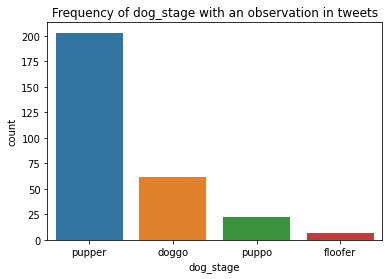

In [118]:
sns.countplot(x='dog_stage', order = ['pupper','doggo','puppo','floofer'], data = archive_master)
plt.title('Frequency of dog_stage with an observation in tweets');

> **pupper is the common dog_stage in the tweets**

### Question 2. what is the frequent number of image in the tweets?

In [119]:
# proportion of the number of image in a tweet
image_distr = pd.DataFrame(archive_master.image_number.value_counts(normalize=True))
image_distr

,image_number
1,0.858006
2,0.095670
3,0.031219
4,0.015106


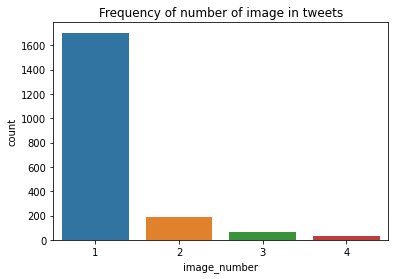

In [120]:
# plot visualization
sns.countplot(x = 'image_number', data = archive_master)
plt.title('Frequency of number of image in tweets');

> over 85% of the tweets have only 1 image

### Question 3 What is the highest source of the tweets?.

In [121]:
# proportion of the highest source of tweets
source_prop = pd.DataFrame(archive_master.source.value_counts(normalize=True))
source_prop

,source
iPhone,0.980866
Web Client,0.014099
TweetDeck,0.005035


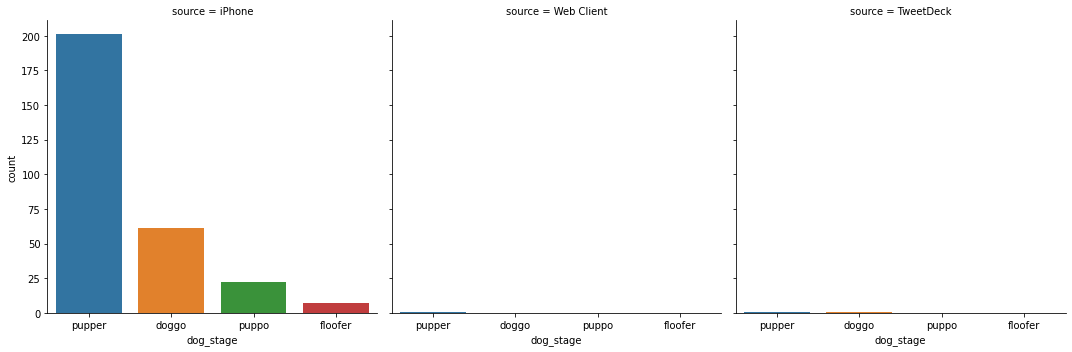

In [122]:
sns.catplot(x='dog_stage',col= 'source',col_wrap = 3,order = ['pupper','doggo','puppo','floofer'],\
            data = archive_master, kind='count',height=5, aspect=1);

> **about 98% of the tweets are from iPhone source and pupper is tweeted most**

### Question 4 What is the first 5 breed of dogs with highest favorite count?

In [123]:
favorite_breed_count = archive_master[archive_master.dog_breed != "None"]

In [124]:
favorite_breed_count = favorite_breed_count.groupby(['dog_breed'])['favorite_count'].sum()

In [125]:
favorite_breed_count = archive_master[archive_master.dog_breed != "None"]
favorite_breed_count = favorite_breed_count.groupby(['dog_breed'])
favorite_breed_count = favorite_breed_count['favorite_count'].sum()
favorite_breed_count = favorite_breed_count.sort_values(ascending=False).head(5)
favorite_breed_count

dog_breed
Golden Retriever      1475595
Labrador Retriever     910450
Pembroke               867451
Chihuahua              598268
Samoyed                447897
Name: favorite_count, dtype: int64

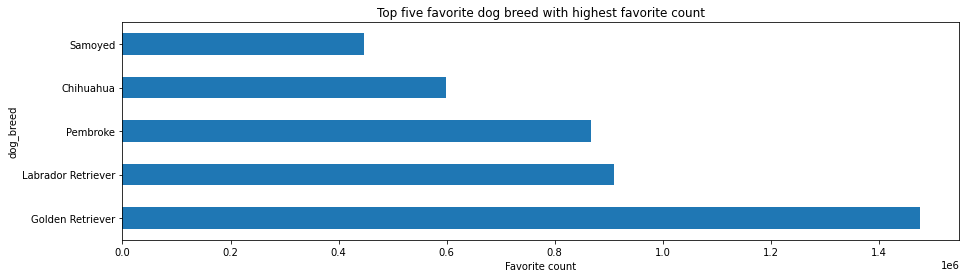

In [126]:
favorite_breed_count.plot(kind = 'barh', figsize=(15,4))
plt.title('Top five favorite dog breed with highest favorite count')
plt.xlabel('Favorite count')

plt.show()

> Golden Retriever is has the highest favorite count followed by Labrador Retriever